<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/RL_Gym_FrozenLake_v1_Qlearning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frozen Lake 강화학습 연습

<img src="https://github.com/aidentify/lecture/blob/master/study2/2_RL/img/frozenlake_env.png?raw=1" width="700">

## 필요한 모듈 import
* gym (가상환경을 제공) 
* numpy (텐서 연산)
* matplotlib (결과 그래프 출력)

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 68.9 MB/s 


## 가상환경 설정 및 hyper parameter 정의
* gym.make를 이용하여 등록된 'FrozenLake-v0' 환경을 env로 정의, is_slippery=True $\rightarrow$ Transition Prob = 1.0
* learning rate (학습률)
* dis (감쇄계수)
* num_episodes(전체 반복 학습)
* env.render(): 설정한 가상환경을 보고싶을 때, S: Start, F: Frozen, H: Hole, G: Goal, 붉은 박스: 현재 위치

In [3]:
#env = gym.make('FrozenLake-v0', is_slippery=False)
env = gym.make('FrozenLake-v1', is_slippery=False)

import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

learning_rate = 0.8
dis = .95
num_episodes = 2000

env.reset()
env.render()

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't 

## 펭수가 학습할 가상환경 관찰
* info = 상태전이 확률 (if slippery = true, then prob = 0.333333)
* env.render(): 설정한 가상환경을 보고싶을 때, S: Start, F: Frozen, H: Hole, G: Goal, 붉은 박스: 현재 위치

In [10]:
env.reset()
for i in range(10):
    random_action = env.action_space.sample()
    new_state, reward, done, info = env.step(random_action)
    env.render()
    print(new_state, reward, done,  info)
    if done:
      break

0 0.0 False {'prob': 1.0}
1 0.0 False {'prob': 1.0}
0 0.0 False {'prob': 1.0}
0 0.0 False {'prob': 1.0}
1 0.0 False {'prob': 1.0}
2 0.0 False {'prob': 1.0}
2 0.0 False {'prob': 1.0}
3 0.0 False {'prob': 1.0}
3 0.0 False {'prob': 1.0}
3 0.0 False {'prob': 1.0}


## Q-Table 및 보상값 리스트 정의
* Q = Q-Table [num_states, num_actions]

In [11]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
rList = []

print("number of states: ", env.observation_space.n)
print("number of actions: ", env.action_space.n)

number of states:  16
number of actions:  4


## 학습 시작
* num_episodes 만큼 반복
* 한번 에피소드 당 99번 반복하거나 terminal state (Hole, Goal)에 도착하면 다음 에피소드로
*  $\epsilon$ - greedy를 적용하여  $\epsilon$ = 1/(n+1) 확률 만큼 maxQ(s,a)가 아닌 액션을 취함 (이때 n은 100번 에피소스마다 1씩 증가)

In [12]:
for i in range(num_episodes):
    
    # env 리셋
    state = env.reset()
    rAll = 0
    done = False
    
    e = 1./((i//100)+1) # decaying E-greedy
    
    j = 0
    
    # 99번 반복하거나 terminal state (Hole, Goal) 도착
    while j < 99:
        
        j += 1
        
        # egreedy에 의한 행동 설정
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        # new_state, reward 업데이트 
        new_state, reward, done, _ = env.step(action)
        
        # 업데이트 Q-table (상태, 행동)
        Q[state, action] += learning_rate*( reward + dis*np.max(Q[new_state, :]) - Q[state, action] )
        
        rAll += reward
        state = new_state

        if done == True:
            break
        
    rList.append(rAll)

성공율:  0.7925
Q-table
[[0.73509189 0.77378094 0.6983373  0.73509189]
 [0.73509189 0.         0.64016809 0.69833717]
 [0.67040099 0.850516   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.6255408 ]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.90249998 0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81449548 0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


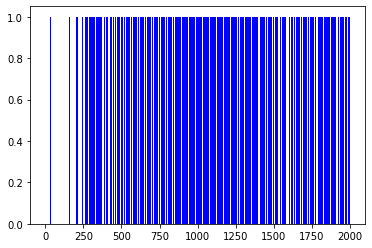

In [13]:
print('성공율: ', str(sum(rList)/num_episodes))
print('Q-table')
print(Q)
plt.bar(range(len(rList)), rList, color = 'blue')
plt.show()